In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Better plot style
sns.set(style="whitegrid")
df = pd.read_csv("2026.csv")
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Andhra Pradesh,Anantapur,Anantapur APMC,Mousambi (Sweet Lime),Mousambi,Medium,2025-12-30,800.0,1700.0,1200.0,77
1,Andhra Pradesh,Annamayya,Valmikipuram APMC,Tomato,Local,FAQ,2025-12-30,4400.0,4800.0,4600.0,78
2,Odisha,Kendrapara,Pattamundai APMC,Cauliflower,Local,Grade A,2025-12-30,3000.0,3000.0,3000.0,34
3,Andhra Pradesh,Chittor,Palamaner APMC,Cabbage,Cabbage,FAQ,2025-12-30,800.0,1300.0,1100.0,154
4,Odisha,Kendrapara,Pattamundai APMC,Tomato,Other,Grade B,2025-12-30,5000.0,5000.0,5000.0,78


In [4]:
df.shape

(205246, 11)

In [6]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price',
       'Commodity_Code'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205246 entries, 0 to 205245
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   State           205246 non-null  object 
 1   District        205246 non-null  object 
 2   Market          205246 non-null  object 
 3   Commodity       205246 non-null  object 
 4   Variety         205246 non-null  object 
 5   Grade           205246 non-null  object 
 6   Arrival_Date    205246 non-null  object 
 7   Min_Price       205246 non-null  float64
 8   Max_Price       205246 non-null  float64
 9   Modal_Price     205246 non-null  float64
 10  Commodity_Code  205246 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 17.2+ MB


In [8]:
df.describe()

,Min_Price,Max_Price,Modal_Price,Commodity_Code
count,205246.000000,205246.000000,205246.000000,205246.000000
mean,4174.069350,4898.966549,4558.811236,108.037277
std,7333.638399,8521.278028,7777.487346,98.308953
min,0.000000,0.500000,0.500000,1.000000
25%,2000.000000,2500.000000,2250.000000,24.000000
50%,3200.000000,3900.000000,3500.000000,83.000000
75%,5000.000000,5600.000000,5300.000000,159.000000
max,790000.000000,800000.000000,795000.000000,463.000000


In [10]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])

In [11]:
df['Arrival_Date'].dtype

dtype('<M8[ns]')

In [12]:
#Filtering only Tomato data
tomato_df = df[df['Commodity'] == 'Tomato']
tomato_df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
1,Andhra Pradesh,Annamayya,Valmikipuram APMC,Tomato,Local,FAQ,2025-12-30,4400.0,4800.0,4600.0,78
4,Odisha,Kendrapara,Pattamundai APMC,Tomato,Other,Grade B,2025-12-30,5000.0,5000.0,5000.0,78
9,Odisha,Keonjhar,Champua APMC,Tomato,Other,Local,2025-12-30,4000.0,4000.0,4000.0,78
12,Odisha,Bhadrak,Chandabali APMC,Tomato,Other,Grade Range-2,2025-12-30,3240.0,3240.0,3240.0,78
21,Assam,Darrang,Besimari APMC,Tomato,Tomato,Local,2025-12-30,3300.0,3500.0,3400.0,78


In [13]:
#filter for Andhra Pradesh
tomato_ap = tomato_df[tomato_df['State'] == 'Andhra Pradesh']
tomato_ap.shape

(66, 11)

In [15]:
tomato_ap.isnull().sum() #checking missing values

State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64

In [17]:
tomato_ap = tomato_ap.dropna() #drop rows with missing values

In [18]:
tomato_ap = tomato_ap.sort_values('Arrival_Date')

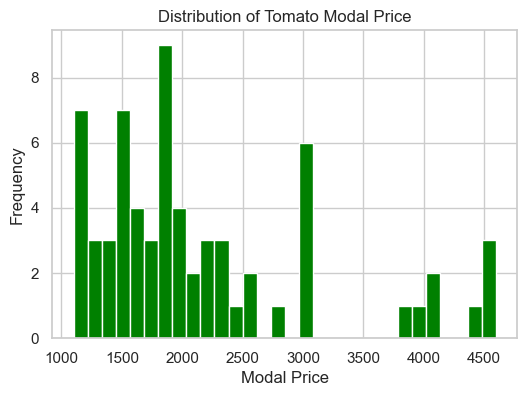

In [19]:
#price distribution (univariate analysis)
plt.figure(figsize=(6,4))
plt.hist(tomato_ap['Modal_Price'], bins=30, color='green')
plt.title("Distribution of Tomato Modal Price")
plt.xlabel("Modal Price")
plt.ylabel("Frequency")
plt.show()

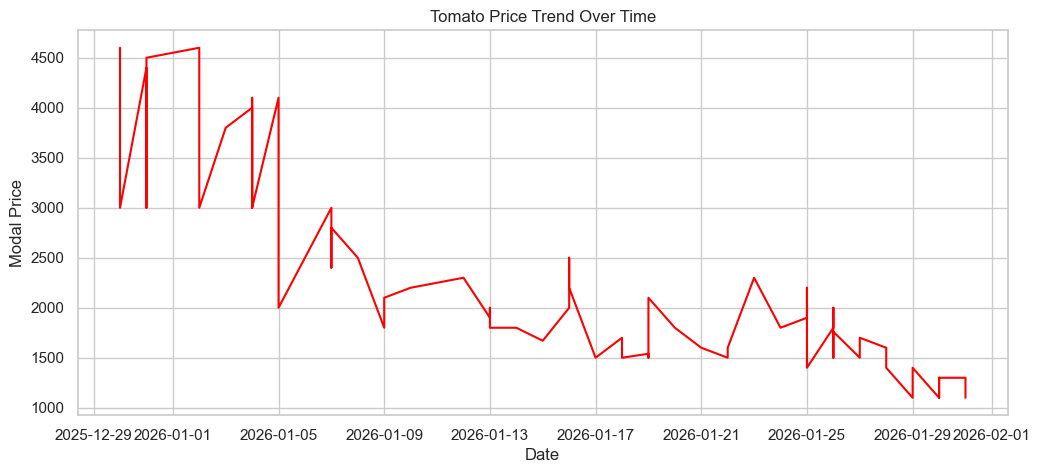

In [21]:
plt.figure(figsize=(12,5))
plt.plot(tomato_ap['Arrival_Date'], tomato_ap['Modal_Price'], color='red')
plt.title("Tomato Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Modal Price")
plt.show() #core graph and must go in ppt

In [22]:
#monthly seasonality analysis
tomato_ap['Month'] = tomato_ap['Arrival_Date'].dt.month #extracting month

In [23]:
#average monthly price
monthly_avg = tomato_ap.groupby('Month')['Modal_Price'].mean()
monthly_avg

Month
1     2019.180328
12    3900.000000
Name: Modal_Price, dtype: float64

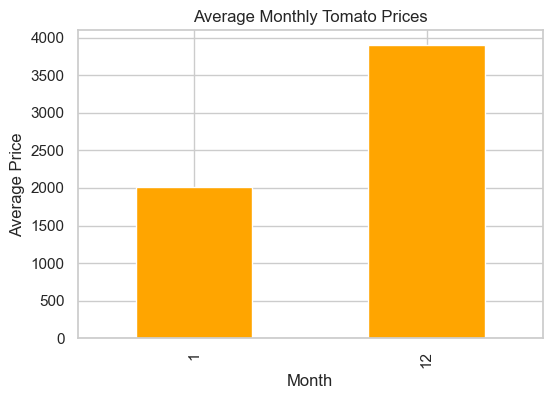

In [24]:
plt.figure(figsize=(6,4))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Average Monthly Tomato Prices")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()

In [25]:
#market-wise price comparison
market_avg = tomato_ap.groupby('Market')['Modal_Price'].mean().sort_values().head(5)
market_avg

Market
Punganur APMC        1818.333333
Kalikiri APMC        1972.727273
Palamaner APMC       2033.333333
Pattikonda APMC      2107.692308
Valmikipuram APMC    2240.000000
Name: Modal_Price, dtype: float64

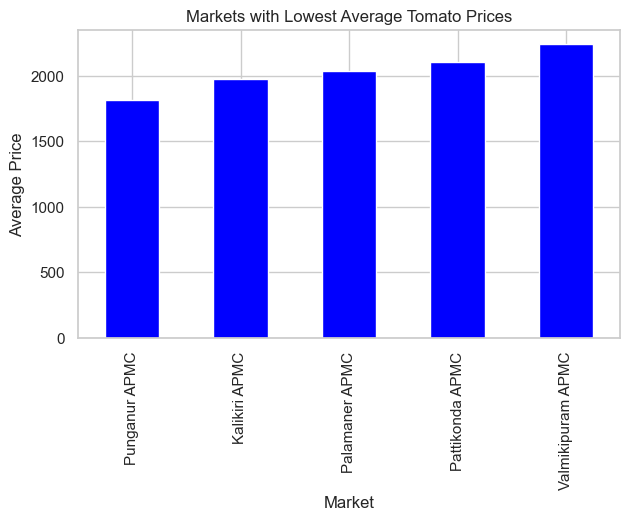

In [26]:
plt.figure(figsize=(7,4))
market_avg.plot(kind='bar', color='blue')
plt.title("Markets with Lowest Average Tomato Prices")
plt.xlabel("Market")
plt.ylabel("Average Price")
plt.show()

In [27]:
#correlation analysis
price_corr = tomato_ap[['Min_Price','Max_Price','Modal_Price']].corr()
price_corr

,Min_Price,Max_Price,Modal_Price
Min_Price,1.000000,0.955753,0.984529
Max_Price,0.955753,1.000000,0.986979
Modal_Price,0.984529,0.986979,1.000000


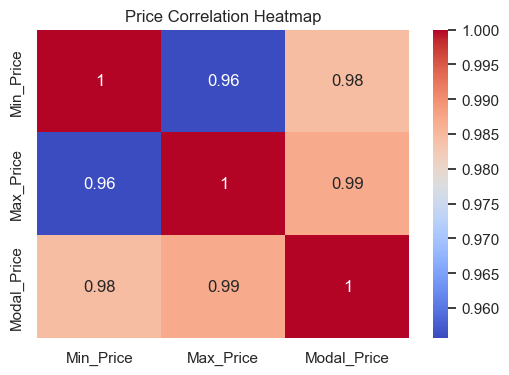

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(price_corr, annot=True, cmap="coolwarm")
plt.title("Price Correlation Heatmap")
plt.show()

In [30]:
#ML
#preparing time-series data
tomato_ts = tomato_ap.set_index('Arrival_Date') #Setting Arrival_Date as index
price_series = tomato_ts['Modal_Price'] #keepinh only price column

In [33]:
#rolling avg(trend smoothing)
tomato_ts['Rolling_7'] = price_series.rolling(window=7).mean()
tomato_ts['Rolling_30'] = price_series.rolling(window=30).mean()
#removed noise and shows real trends

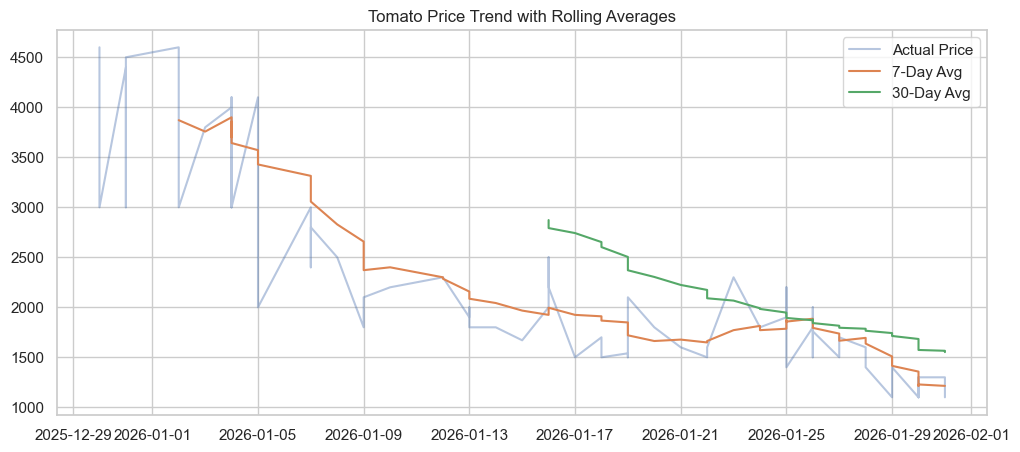

In [32]:
plt.figure(figsize=(12,5))
plt.plot(price_series, alpha=0.4, label='Actual Price')
plt.plot(tomato_ts['Rolling_7'], label='7-Day Avg')
plt.plot(tomato_ts['Rolling_30'], label='30-Day Avg')
plt.legend()
plt.title("Tomato Price Trend with Rolling Averages")
plt.show()

In [34]:
#votality analysis
# Daily percentage change
tomato_ts['Daily_Change'] = price_series.pct_change()

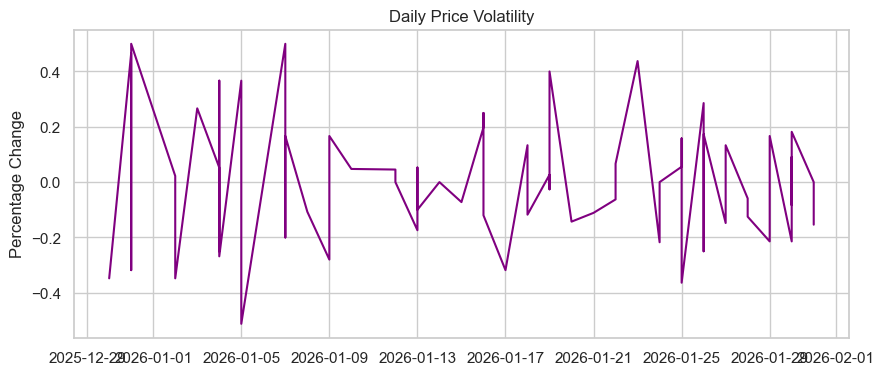

In [35]:
plt.figure(figsize=(10,4))
plt.plot(tomato_ts['Daily_Change'], color='purple')
plt.title("Daily Price Volatility")
plt.ylabel("Percentage Change")
plt.show()

In [36]:
#lowest price window detection (core feature)
# Smooth price
tomato_ts['Smooth_Price'] = price_series.rolling(14).mean()

In [38]:
#detecting local minima
lowest_price_days = tomato_ts[
    (tomato_ts['Smooth_Price'] < tomato_ts['Smooth_Price'].shift(1)) &
    (tomato_ts['Smooth_Price'] < tomato_ts['Smooth_Price'].shift(-1))
]

lowest_price_days[['Smooth_Price']].head()
#the WOW factor

,Smooth_Price
Arrival_Date,
2026-01-16,2112.142857
2026-01-22,1765.000000
2026-01-25,1724.285714
2026-01-25,1752.857143
2026-01-27,1761.428571


In [39]:
#LR model (forecasting)
from sklearn.linear_model import LinearRegression

In [40]:
model_data = tomato_ts.dropna()

In [41]:
# Prepare X (time index) and y (price)
X = np.arange(len(model_data)).reshape(-1,1)
y = model_data['Modal_Price'].values

In [42]:
#training LR model
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [44]:
#Predicting next 14 days
future_days = np.arange(len(X), len(X)+14).reshape(-1,1)
future_prices = lr_model.predict(future_days)
future_prices

array([1171.44144144, 1149.17022285, 1126.89900427, 1104.62778568,
       1082.35656709, 1060.08534851, 1037.81412992, 1015.54291133,
        993.27169275,  971.00047416,  948.72925557,  926.45803698,
        904.1868184 ,  881.91559981])

In [46]:
#Decision Intelligence
def buying_advice(current_price, predicted_price):
    if predicted_price > current_price:
        return "Buy Now"
    elif predicted_price < current_price:
        return "Wait"
    else:
        return "Stable – Buy if needed"

In [47]:
current_price = model_data['Modal_Price'].iloc[-1]
predicted_price = future_prices[0]

buying_advice(current_price, predicted_price)


'Buy Now'